In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-dr9wyjp1 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
from utils import *
from dataset import *
from data_module import *

In [3]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [4]:
df = pd.read_csv('dataset_strat.csv')

In [5]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[3605, 883, 3800, 1077], [1699, 364, 1893, 55...",10,0
1,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[431, 2375, 626, 2570]]",1,0
2,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,1512,2016,Bolt,"[[904, 1783, 1003, 1886], [188, 117, 292, 210]...",8,0
3,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[3480, 2385, 3680, 2580]]",1,0
4,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,1512,2016,Bolt,"[[248, 1227, 348, 1327], [1263, 153, 1363, 256...",3,0
...,...,...,...,...,...,...,...
174,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[1449, 364, 1644, 559], [2492, 374, 2687, 573...",11,4
175,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[391, 404, 591, 598], [1454, 414, 1654, 608]]",2,4
176,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[287, 284, 486, 484], [2492, 294, 2697, 494],...",7,4
177,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[376, 2375, 571, 2570], [3410, 414, 3610, 613]]",2,4


In [6]:
df["bboxes"] = df["bboxes"].apply(eval)

In [7]:
test_dataset = BoltDataset(df, get_valid_transforms(), 'train')

In [8]:
test_dataset[0]

(tensor([[[1.6324, 1.5982, 1.5810,  ..., 1.4612, 1.4612, 1.4783],
          [1.6153, 1.6324, 1.6495,  ..., 1.4612, 1.4612, 1.4440],
          [1.5810, 1.6153, 1.6495,  ..., 1.4440, 1.4954, 1.4783],
          ...,
          [1.6324, 1.6667, 1.6324,  ..., 1.6324, 1.5982, 1.5639],
          [1.5982, 1.6667, 1.6495,  ..., 1.5810, 1.5982, 1.5810],
          [1.6153, 1.6667, 1.6495,  ..., 1.6324, 1.5810, 1.5639]],
 
         [[1.8683, 1.8508, 1.8508,  ..., 1.6933, 1.7108, 1.7108],
          [1.8683, 1.8683, 1.8333,  ..., 1.7283, 1.6758, 1.7108],
          [1.7983, 1.8508, 1.8508,  ..., 1.7283, 1.7458, 1.7283],
          ...,
          [1.9384, 1.9559, 1.9209,  ..., 1.8683, 1.8158, 1.8859],
          [1.9034, 1.9559, 1.9209,  ..., 1.8508, 1.8508, 1.8333],
          [1.9034, 1.9384, 1.9384,  ..., 1.8508, 1.8333, 1.8158]],
 
         [[2.2043, 2.1346, 2.1868,  ..., 1.9603, 1.9951, 1.9777],
          [2.1171, 2.1694, 2.1520,  ..., 2.0300, 1.9603, 1.9777],
          [2.0823, 2.1694, 2.2217,  ...,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 1024, 1024])


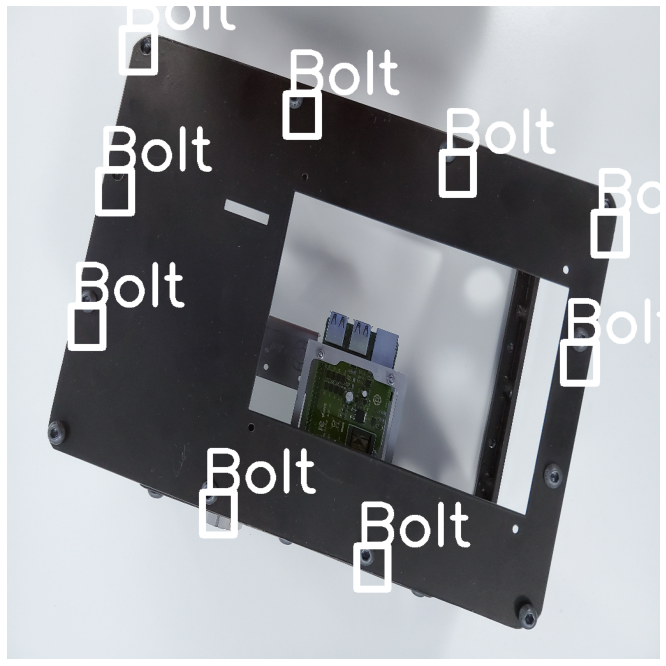

In [9]:
test_dataset.show_data(5)

In [10]:
bolt_module = BoltDataModule(df,
                             get_train_transforms(target_img_size=512),
                             get_valid_transforms(target_img_size=512),
                             num_workers=16,
                             bs=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 512, 512])


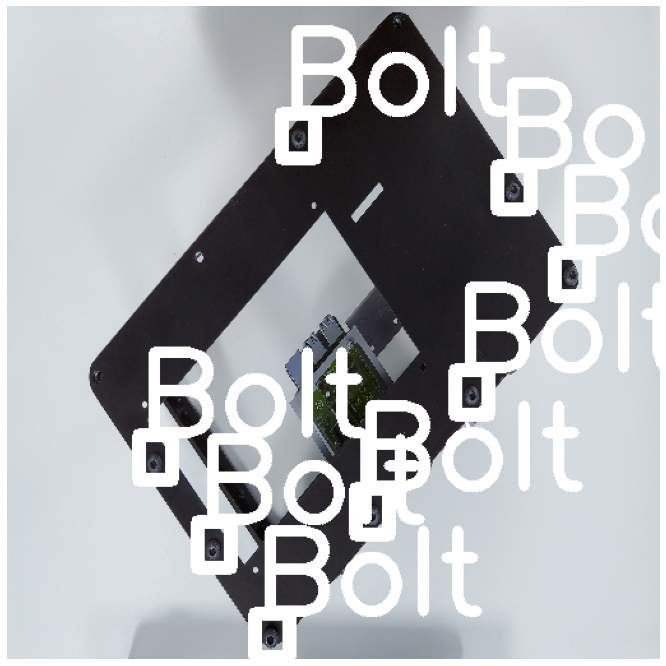

In [11]:
bolt_module.train_dataset().show_data(13)

In [12]:
loader = bolt_module.train_dataloader()

In [13]:
len(loader)

54

In [14]:
from multiprocessing.managers import SharedMemoryManager
smm = SharedMemoryManager()
smm.start()
sl = smm.ShareableList(range(4))
sl

ShareableList([0, 1, 2, 3], name='psm_517e477b')

In [17]:
raw_shm = smm.SharedMemory(size=1280000)

In [18]:
images, annotations, targets, bolts = next(iter(loader))

In [19]:
targets

[{'bboxes': tensor([[311.6190,  83.9788, 337.0159, 117.8413],
          [ 38.8571, 427.6825,  65.0159, 461.5450],
          [440.8889, 424.2963, 464.5079, 456.8042]]),
  'labels': tensor([1, 1, 1]),
  'bolts': 3,
  'img_size': [512, 512],
  'img_scale': tensor([1.])},
 {'bboxes': tensor([[452.0635, 409.7354, 477.4603, 442.5820],
          [ 30.4762, 413.1217,  56.6349, 445.9683],
          [ 31.2381, 168.9735,  57.3968, 202.4974],
          [454.6032,  57.2275, 478.9841,  91.0900],
          [ 29.7143,  46.0529,  56.6349,  81.9471],
          [311.8730, 413.1217, 337.0159, 448.3386],
          [452.8254, 173.3757, 477.4603, 208.2540]]),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1]),
  'bolts': 7,
  'img_size': [512, 512],
  'img_scale': tensor([1.])}]

In [20]:
smm.shutdown()